In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the Data using the Engine xlrd - which is used to read the excel file in the format (xls, xlsx)
#openpyxl is used to read and write excel files (xlsx, xlsm, xltx and xltm)
dataset = pd.read_excel("./DS4.xls", engine='xlrd')
dataset.head()

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X1,X2,X3,X4,X5
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [3]:
#Finding if the Dataset has any na values or null values
print(dataset.isna().values.any())
print(dataset.isnull().values.any())

False
False


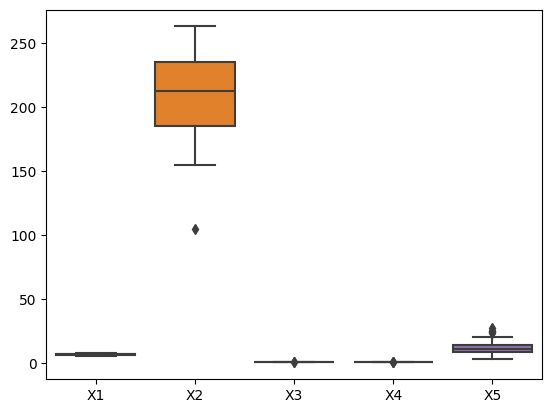

In [4]:
#Visulizing the Dataset to find whether we have any outliers
import seaborn as sns
sns.boxplot(dataset) #Box Plot
plt.show()

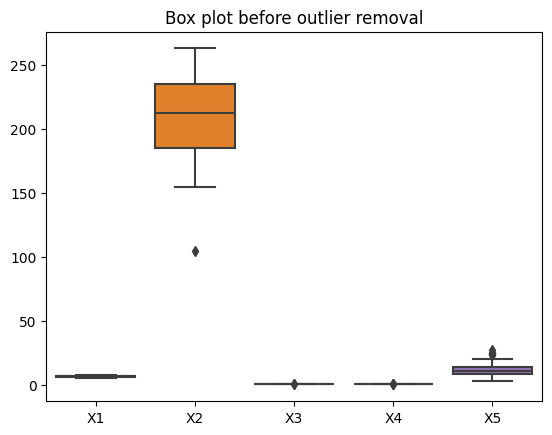

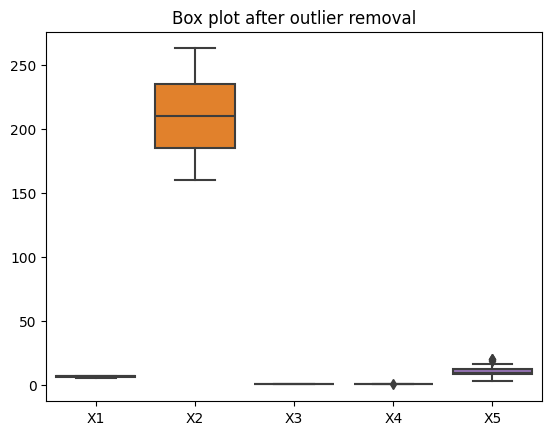

In [5]:
#Removing the Outliers using IQR Method

sns.boxplot(dataset)
plt.title('Box plot before outlier removal')
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] >= (iqr + np.percentile(df[field_name], 75))].index, inplace=True) #Removing Outliers above the upper bound
    df.drop(df[df[field_name] <= (np.percentile(df[field_name], 25) - iqr)].index, inplace=True) #Removing Outliers below the lower bound

drop_outliers(dataset, 'X1')
drop_outliers(dataset, 'X2')
drop_outliers(dataset, 'X3')
drop_outliers(dataset, 'X4')
drop_outliers(dataset, 'X5')
sns.boxplot(dataset)
plt.title('Box plot after outlier removal')
plt.show()

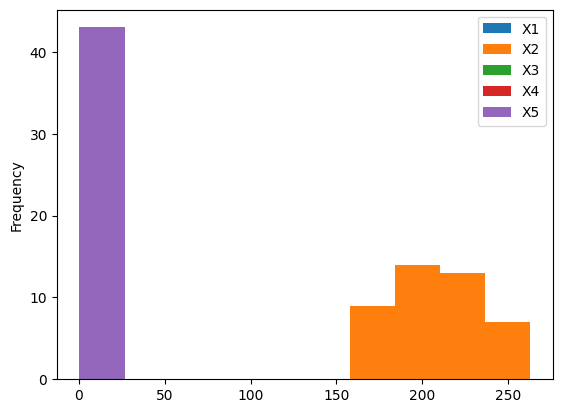

In [6]:
#Finding out which features affects the overall output
dataset.plot(kind='hist')
plt.show()

,X1,X2,X3,X4,X5
0,0.580878,0.545593,-0.126057,-1.304611,-0.334463
1,-0.586307,-1.116961,-0.274273,0.702339,0.266788
2,-0.352870,-0.747505,0.170374,0.124338,1.252839
3,-0.819744,-1.116961,-0.676574,-1.641778,-0.478763
6,-0.586307,-0.932233,0.826759,0.284894,-0.310413
7,0.580878,0.915049,0.445633,-0.052274,1.300939
8,0.814315,0.915049,-0.274273,1.039507,-1.416714
9,0.347441,-0.008592,0.678543,1.151896,0.459188
10,0.814315,1.284505,1.440797,-1.946835,2.286990
11,0.814315,1.284505,0.953801,0.060115,-0.358513


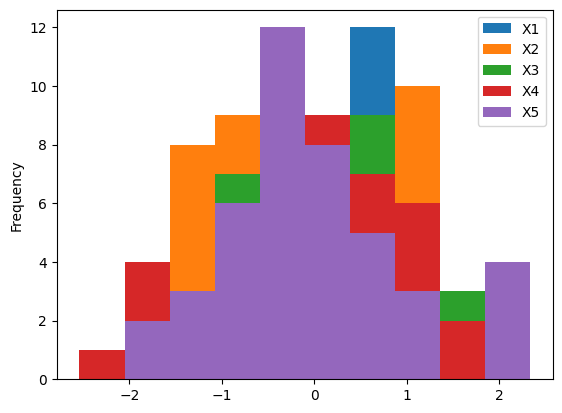

In [7]:
#Copying the Dataset
dataset_copy = dataset.copy()

#Applying the Z-score Normalization Technique
for column in dataset_copy:
    dataset_copy[column] = (dataset_copy[column] - dataset_copy[column].mean()) / dataset_copy[column].std()

#Viewing the Normalized Data
display(dataset_copy)

#Plotting
dataset_copy.plot(kind='hist')
plt.show()

In [8]:
#Splitting the Dataset into training and testing using numpy

data_split = np.random.rand(len(dataset_copy)) < 0.8 #Getting 80% of the overall dataset
train_data = dataset_copy[data_split] #80% data as train_data
test_data = dataset_copy[~data_split] #Remaining data as test_data
print(train_data)
print(test_data)

          X1        X2        X3        X4        X5
0   0.580878  0.545593 -0.126057 -1.304611 -0.334463
1  -0.586307 -1.116961 -0.274273  0.702339  0.266788
2  -0.352870 -0.747505  0.170374  0.124338  1.252839
3  -0.819744 -1.116961 -0.676574 -1.641778 -0.478763
6  -0.586307 -0.932233  0.826759  0.284894 -0.310413
7   0.580878  0.915049  0.445633 -0.052274  1.300939
11  0.814315  1.284505  0.953801  0.060115 -0.358513
12 -0.586307 -0.932233 -1.565869 -0.710554 -0.599013
13 -1.053180 -0.932233 -0.507184  0.461505 -0.478763
14 -0.819744 -1.116961 -0.147231  0.349116  2.335090
18 -0.586307 -0.008592 -1.629390  1.007396  0.146537
19  1.281189  1.099777  1.186712 -0.630276 -0.021813
20  0.580878  0.545593 -1.015353  0.188560 -0.118013
21  1.748062  1.949527  0.720891 -1.577556 -0.815464
23  0.580878  0.915049 -0.422489 -0.405497 -0.382563
25 -0.352870 -0.747505 -0.147231  0.060115  0.483238
31 -1.286617 -1.301689 -1.290611 -0.517886 -0.695214
32 -1.286617 -0.673614 -0.253100  0.509672 -0.

In [9]:
#Feature Selection - as array
X = train_data[['X1', 'X2', 'X3', 'X4']].values
Y = train_data['X5'].values
print("Target: %s, \nFeatures: %s" %(Y, X))

Target: [-0.33446317  0.26678751  1.25283864 -0.47876334 -0.31041315  1.3009387
 -0.3585132  -0.59901348 -0.47876334  2.33508988  0.14653738 -0.02181282
 -0.11801293 -0.81546372 -0.38256323  0.48323776 -0.69521359 -0.23826306
 -0.81546372  0.41108768 -0.40661326  0.72373804 -1.87366493 -0.28636312
  1.15663853 -0.76736367  1.9983895   0.38703765  0.09843732  0.29083754
  0.24273749 -1.15216411 -0.55091342], 
Features: [[ 0.58087788  0.54559259 -0.12605738 -1.30461083]
 [-0.58630665 -1.11696121 -0.27427329  0.70233914]
 [-0.35286974 -0.74750481  0.17037443  0.12433755]
 [-0.81974355 -1.11696121 -0.67657362 -1.64177842]
 [-0.58630665 -0.93223301  0.82675918  0.28489355]
 [ 0.58087788  0.91504899  0.44563255 -0.05227405]
 [ 0.81431478  1.28450539  0.95380139  0.06011515]
 [-0.58630665 -0.93223301 -1.56586908 -0.71055364]
 [-1.05318046 -0.93223301 -0.50718401  0.46150515]
 [-0.81974355 -1.11696121 -0.14723109  0.34911595]
 [-0.58630665 -0.00859201 -1.62939018  1.00739554]
 [ 1.28118859  1.

In [13]:
#Calculating the Beta Value

n = len(X) # Number of Data points
p = len(X[0]) # Number of features

#Calculate the Coefficients (beta values)
X_transpose = [[X[j][i] for j in range(n)] for i in range(p)] #Transpose X
X_transpose_X = [[sum(X_transpose[i][j] * X[j][k] for j in range(n)) for k in range(p)] for i in range(p)]
X_transpose_Y = [sum(X_transpose[i][j] * Y[j] for j in range(n)) for i in range(p)]

#Solving for beta values
beta = np.linalg.solve(X_transpose_X, X_transpose_Y)

beta

array([ 0.11298383, -0.2236801 ,  0.09991186,  0.40341783])

In [14]:
#Making Predictions on Test Data
X_test = test_data[['X1', 'X2', 'X3', 'X4']].values
Y_test = test_data['X5'].values

#Add a column of ones for the intercept term
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

#Ensuring beta has the correct dimensions by adding an intercept term coefficient
beta = np.append(beta, 0) # Add a coefficient for the intercept term

#make Predictions
Y_pred = X_test.dot(beta)

Y_pred

array([-0.08838467,  0.30814621,  0.64041814,  0.54997819,  0.49977666,
       -0.41033317, -0.04452204,  0.40667648,  0.01267184, -0.3352808 ])

In [12]:
#Evaluating the Model
mse = ((Y_test - Y_pred) ** 2).mean()

#Calculating R-squared(R2)
ssr = ((Y_test - Y_pred) ** 2).sum()
sst = ((Y_test - Y_test.mean()) ** 2).sum()
r2 = 1 - (ssr/sst)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared Error (R2): {r2}')

Mean Squared Error (MSE): 1.2530201238284142
R-Squared Error (R2): 0.2820408045788497
